In [ ]:
import os
import imageio
import networkx as nx
import networkx.classes.graph as NxGraph
import matplotlib.pyplot as plt
import graphGeneretor as gg

from graph_generator import GraphCreator, GraphType

In [ ]:
# noinspection PyAttributeOutsideInit
class GraphSearch:
    def __init__(self, graph: NxGraph):
        self.graph = graph
        self.image_index = 1
        self.folder = "resources"
        self.filenames = []

    def save_graph(self):
        filename = self.folder + "/graph_" + str(self.image_index) + ".png"
        plt.savefig(filename)
        self.filenames.append(filename)
        self.image_index += 1

    def create_gif(self, filename="graph_animation.gif"):
        with imageio.get_writer(self.folder + '/' + filename, mode='I') as writer:
            for filename in self.filenames:
                image = imageio.imread(filename)
                writer.append_data(image)

    def remove_pictures(self):
        for filename in set(self.filenames):
            os.remove(filename)

    def assemble_gif(self, filename="graph_animation.gif"):
        self.create_gif(filename)
        self.remove_pictures()

    def draw_graph(self):
        fig, ax = plt.subplots()
        my_pos = nx.spring_layout(self.graph, seed=100)
        raw_colors = [n[1]['color'] for n in self.graph.nodes(data=True)]
        nx.draw(G, pos=my_pos, with_labels=1, node_size=500,
                node_color=raw_colors, font_color='white', edge_color='black')
        background_color = 'white'
        ax.set_facecolor(background_color)
        ax.axis('off')
        fig.set_facecolor(background_color)
        self.save_graph()
        plt.show()

    def reset_graph(self):
        for node in self.graph.nodes:
            self.graph.nodes[node]["color"] = "mediumblue"
            self.graph.nodes[node]["is_visited"] = False

    def generate_backtrack_list(self, origin_node: int, target_node: int) -> list:
        backtrack_list = []
        c = target_node
        while self.graph.nodes[c]["parent"] is not None:
            backtrack_list.append(c)
            c = self.graph.nodes[c]["parent"]
        backtrack_list.append(origin_node)
        backtrack_list.reverse()
        return backtrack_list

    def breadth_first_search(self, origin: int, target: int) -> dict:
        stack = [origin]
        expanded_nodes = []

        while stack:
            current_node = stack.pop(0)
            self.graph.nodes[current_node]["color"] = "red"
            self.draw_graph()
            if current_node == target:
                self.graph.nodes[current_node]["color"] = "green"
                self.draw_graph()
                backtrack_list = self.generate_backtrack_list(origin, target)
                return {"target_node": self.graph.nodes[current_node],
                        "path": backtrack_list,
                        "expanded_nodes": expanded_nodes}
            else:
                self.graph.nodes[current_node]["is_visited"] = True
                for neighbour in self.graph.nodes[current_node]["neighbours"]:
                    if not self.graph.nodes[neighbour]["is_visited"] and neighbour not in stack:
                        self.graph.nodes[neighbour]["color"] = "orange"
                        stack.append(neighbour)
                        expanded_nodes.append(neighbour)
                        self.graph.nodes[neighbour]["parent"] = current_node
                        self.draw_graph()
                self.graph.nodes[current_node]["color"] = "gray"

        return {None: None}

    def is_node_leaf(self, input_node: int) -> bool:
        return bool(
            len(self.graph.nodes[input_node]["neighbours"]) == 1
            and self.graph.nodes[self.graph.nodes[input_node]["neighbours"][0]][
                "is_visited"
            ]
        )

    def depth_first_search(self, origin: int, target: int) -> dict:
        n = len(self.graph.nodes)
        expanded_nodes = []
        self.dfs_target_node = None

        def dfs(at):
            aux = self.graph.nodes[at]
            neighbours = self.graph.nodes[at]["neighbours"]
            is_leaf = self.is_node_leaf(at)
            if self.graph.nodes[at]["label"] == target:
                self.graph.nodes[at]["color"] = "green"
                self.draw_graph()
                self.dfs_target_node = aux
                return None
            else:
                self.graph.nodes[at]["is_visited"] = True
                self.graph.nodes[at]["color"] = "red"
                if is_leaf:
                    self.graph.nodes[at]["color"] = "grey"
                self.draw_graph()
                for neighbour in neighbours:
                    if self.graph.nodes[neighbour]["is_visited"] is False:
                        expanded_nodes.append(neighbour)
                        self.graph.nodes[neighbour]["parent"] = at
                        self.graph.nodes[neighbour]["color"] = "orange"
                        self.draw_graph()
                        dfs(neighbour)
                    else:
                        if self.graph.nodes[neighbour]["color"] != "grey":
                            self.graph.nodes[neighbour]["color"] = "grey"
                            self.draw_graph()

        dfs(origin)
        dfs_result = {"target_node": self.dfs_target_node,
                      "path": self.generate_backtrack_list(origin, target),
                      "expanded_nodes": expanded_nodes}
        return {None: None}

    # Check if a neighbor should be added to open list
    def add_to_open(self,open, neighbor):
        for node in open:
            if (neighbor == node and neighbor.f > node.f):
                return False
        return True

    def a_search(self,graph, heuristics, start, end):
    
        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                neighbor.h = heuristics.get(neighbor.name)
                neighbor.f = neighbor.g + neighbor.h
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None
    def busca_custo_uniforme(self,graph, heuristics, start, end):

        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                    neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                    neighbor.h = 0
                    neighbor.f = neighbor.g
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None
    
    def busca_gulosa(self,graph, heuristics, start, end):

        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                    neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                    neighbor.h = heuristics.get(neighbor.name)
                    neighbor.f = neighbor.h
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None

In [ ]:
gc = GraphCreator()
gs = GraphSearch(G)
#G = gc.create_default_graph(GraphType.dfs)
#result = gs.breadth_first_search(0, 10)
#gs.assemble_gif("a_search.gif")


cidadeComeco = "Brasilia"
cidadeFim = 'SaoPaulo'
graph, heuristics = gg.graph_generetor(cidadeFim)
#plot grafo do custo uniforme
#result = gs.busca_custo_uniforme(graph, heuristics, cidadeComeco, cidadeFim)
#plot grafo do a*
#print(gs.a_search(graph, heuristics, cidadeComeco, cidadeFim))
#plot grafo do busca gulosa*
#print(gs.busca_gulosa(graph, heuristics, cidadeComeco, cidadeFim))

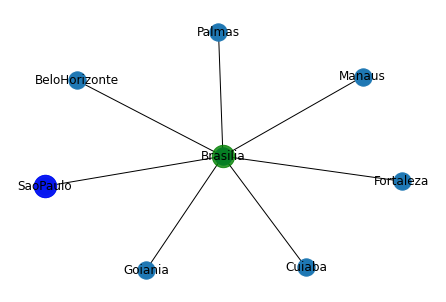

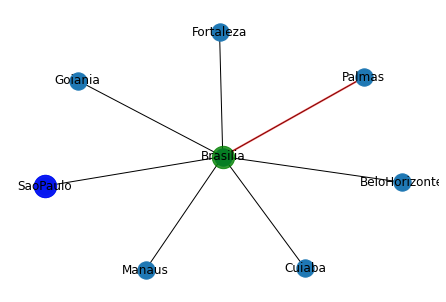

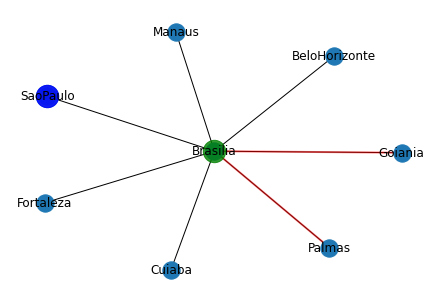

In [142]:
import os
import imageio
import networkx as nx
import networkx.classes.graph as NxGraph
import matplotlib.pyplot as plt
import graphGeneretor as gg

from graph_generator import GraphCreator, GraphType

# noinspection PyAttributeOutsideInit
class GraphSearch:
    def __init__(self, graph: NxGraph):
        self.graph = graph
        self.image_index = 1
        self.folder = "resources"
        self.filenames = []

    def save_graph(self):
        filename = self.folder + "/graph_" + str(self.image_index) + ".png"
        plt.savefig(filename)
        self.filenames.append(filename)
        self.image_index += 1

    def create_gif(self, filename="graph_animation.gif"):
        with imageio.get_writer(self.folder + '/' + filename, mode='I') as writer:
            for filename in self.filenames:
                image = imageio.imread(filename)
                writer.append_data(image)

    def remove_pictures(self):
        for filename in set(self.filenames):
            os.remove(filename)

    def assemble_gif(self, filename="graph_animation.gif"):
        self.create_gif(filename)
        self.remove_pictures()

    def draw_graph(self):
        fig, ax = plt.subplots()
        my_pos = nx.spring_layout(self.graph, seed=100)
        raw_colors = [n[1]['color'] for n in self.graph.nodes(data=True)]
        nx.draw(G, pos=my_pos, with_labels=1, node_size=500,
                node_color=raw_colors, font_color='white', edge_color='black')
        background_color = 'white'
        ax.set_facecolor(background_color)
        ax.axis('off')
        fig.set_facecolor(background_color)
        self.save_graph()
        plt.show()

    def reset_graph(self):
        for node in self.graph.nodes:
            self.graph.nodes[node]["color"] = "mediumblue"
            self.graph.nodes[node]["is_visited"] = False

    def generate_backtrack_list(self, origin_node: int, target_node: int) -> list:
        backtrack_list = []
        c = target_node
        while self.graph.nodes[c]["parent"] is not None:
            backtrack_list.append(c)
            c = self.graph.nodes[c]["parent"]
        backtrack_list.append(origin_node)
        backtrack_list.reverse()
        return backtrack_list

    def breadth_first_search(self, origin: int, target: int) -> dict:
        stack = [origin]
        expanded_nodes = []

        while stack:
            current_node = stack.pop(0)
            self.graph.nodes[current_node]["color"] = "red"
            self.draw_graph()
            if current_node == target:
                self.graph.nodes[current_node]["color"] = "green"
                self.draw_graph()
                backtrack_list = self.generate_backtrack_list(origin, target)
                return {"target_node": self.graph.nodes[current_node],
                        "path": backtrack_list,
                        "expanded_nodes": expanded_nodes}
            else:
                self.graph.nodes[current_node]["is_visited"] = True
                for neighbour in self.graph.nodes[current_node]["neighbours"]:
                    if not self.graph.nodes[neighbour]["is_visited"] and neighbour not in stack:
                        self.graph.nodes[neighbour]["color"] = "orange"
                        stack.append(neighbour)
                        expanded_nodes.append(neighbour)
                        self.graph.nodes[neighbour]["parent"] = current_node
                        self.draw_graph()
                self.graph.nodes[current_node]["color"] = "gray"

        return {None: None}

    def is_node_leaf(self, input_node: int) -> bool:
        return bool(
            len(self.graph.nodes[input_node]["neighbours"]) == 1
            and self.graph.nodes[self.graph.nodes[input_node]["neighbours"][0]][
                "is_visited"
            ]
        )

    def depth_first_search(self, origin: int, target: int) -> dict:
        n = len(self.graph.nodes)
        expanded_nodes = []
        self.dfs_target_node = None

        def dfs(at):
            aux = self.graph.nodes[at]
            neighbours = self.graph.nodes[at]["neighbours"]
            is_leaf = self.is_node_leaf(at)
            if self.graph.nodes[at]["label"] == target:
                self.graph.nodes[at]["color"] = "green"
                self.draw_graph()
                self.dfs_target_node = aux
                return None
            else:
                self.graph.nodes[at]["is_visited"] = True
                self.graph.nodes[at]["color"] = "red"
                if is_leaf:
                    self.graph.nodes[at]["color"] = "grey"
                self.draw_graph()
                for neighbour in neighbours:
                    if self.graph.nodes[neighbour]["is_visited"] is False:
                        expanded_nodes.append(neighbour)
                        self.graph.nodes[neighbour]["parent"] = at
                        self.graph.nodes[neighbour]["color"] = "orange"
                        self.draw_graph()
                        dfs(neighbour)
                    else:
                        if self.graph.nodes[neighbour]["color"] != "grey":
                            self.graph.nodes[neighbour]["color"] = "grey"
                            self.draw_graph()

        dfs(origin)
        dfs_result = {"target_node": self.dfs_target_node,
                      "path": self.generate_backtrack_list(origin, target),
                      "expanded_nodes": expanded_nodes}
        return {None: None}

    # Check if a neighbor should be added to open list
    def add_to_open(self,open, neighbor):
        for node in open:
            if (neighbor == node and neighbor.f > node.f):
                return False
        return True

    def a_search(self,graph, heuristics, start, end):
    
        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                neighbor.h = heuristics.get(neighbor.name)
                neighbor.f = neighbor.g + neighbor.h
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None
    def busca_custo_uniforme(self,graph, heuristics, start, end):

        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                    neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                    neighbor.h = 0
                    neighbor.f = neighbor.g
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None
    
    def busca_gulosa(self,graph, heuristics, start, end):

        # Cria variaveis do grafo
        G = nx.Graph()
        edgelist = []
        # cria uma lista de nós explorados e nao explorados
        open = []
        closed = []
        # Cria um nó de partida e um de chegada
        start_node = Node(start, None)
        goal_node = Node(end, None)
        # Adiciona nó de partida a uma lista de nós não explorados
        open.append(start_node)

        # Faz um loop até que a lista de explorado esteja vazia
        while len(open) > 0:
            # Ordena a lista de não explorados para obter o nó de menor custo
            open.sort()
            # obtem o nó de menor custo
            current_node = open.pop(0)
            # Adiciona o nó atual a lista de explorados
            closed.append(current_node)

            # Verifica se atingimos nosso objetivo, retorna o caminho
            if current_node == goal_node:
                path = []
                while current_node != start_node:
                    path.append(current_node.name + ': ' + str(current_node.g))
                    current_node = current_node.parent
                path.append(start_node.name + ': ' + str(start_node.g))
                # retorna o caminho invertido
                return path[::-1]
            # obtem os vizinhos
            neighbors = graph.get(current_node.name)
            # faz um loop nos vizinhos
            for key, value in neighbors.items():
                # cria um nó vizinho
                neighbor = Node(key, current_node)
                # Verifica se o vizinho está na lista de nós explorados
                if(neighbor in closed):
                    # Relaciona truplas dos grafos
                    edgetruple = (current_node.name, neighbor.name)
                    edgelist.append(edgetruple)
                    continue
                # Calcula o custo total do caminho
                    neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
                    neighbor.h = heuristics.get(neighbor.name)
                    neighbor.f = neighbor.h
                # Verifica se o vizinho esta na lista de explorados e se ele tem o menor custo de f
                if(self.add_to_open(open, neighbor) == True):
                    # Tudo verde, adiciona o vizinho a lista de explorados
                    open.append(neighbor)
                    G.add_edge(current_node.name, neighbor.name)
            # define o posicionamento do grafo
            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=16, with_labels=False)
            # nós
            options = {"node_size": 500, "alpha": 0.8}
            nx.draw_networkx_nodes(G, pos, nodelist=[start_node.name], node_color="g", **options)
            if(goal_node in open):
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="#1f78b4", **options)
                nx.draw_networkx_nodes(G, pos, nodelist=[goal_node.name], node_color="b", **options)
            # arestas
            nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=2, alpha=0.5, edge_color="r")
            # Plot grafo
            nx.draw_networkx_labels(G, pos)
            plt.axis("off")
            plt.show()
        # Return None, no path is found
        print(open)   
        return None
    
    
gc = GraphCreator()
gs = GraphSearch(G)
#G = gc.create_default_graph(GraphType.dfs)
#result = gs.breadth_first_search(0, 10)
#gs.assemble_gif("a_search.gif")


cidadeComeco = "Brasilia"
cidadeFim = 'SaoPaulo'
graph, heuristics = gg.graph_generetor(cidadeFim)
#plot grafo do custo uniforme
result = gs.busca_custo_uniforme(graph, heuristics, cidadeComeco, cidadeFim)
#plot grafo do a*
#print(gs.a_search(graph, heuristics, cidadeComeco, cidadeFim))
#plot grafo do busca gulosa*
#gs.busca_gulosa(graph, heuristics, cidadeComeco, cidadeFim)